We will be working with publicly available airline passenger time series data. To start, let’s import the Pandas library and read the airline passenger data into a data frame

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

import warnings

# Setup
warnings.filterwarnings("ignore")

Let’s display the first five rows of data

In [53]:
airline = pd.read_csv('/Users/maxime/IronHack/Labs/module_2/Lab_21_Time_Series_Models/airlines_passengers.csv')
airline.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


We can see that the data contains a column labeled “Month” that contains dates. In that column, 
the dates are formatted as year–month. We also see that the data starts in the year 1949.
The second column is labeled Passengers, and it contains the number of passengers for the year–month. Let’s take a look at the last five records the data 

In [4]:
airline.iloc[-5:]

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


We see that the data ends in 1960. The next thing we will want to do is convert the month column into a datetime object. 
This will allow it to programmatically pull time values like the year or month for each record.
To do this, we use the Pandas to_datetime() method. Note that this process automatically inserts the first day of each month, which is basically a dummy value since we have no daily passenger data.

In [54]:
airline['Month']=pd.to_datetime(airline['Month'])

The next thing we can do is convert the month column to an index. 


In [55]:
airline = airline.set_index('Month')

In [56]:
airline

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


Let’s generate a time series plot using Seaborn and Matplotlib. This will allow us to visualize the time series data. 
Import the libraries and generate the lineplot. Label the y-axis with Matplotlib “Number of Passengers”

[]

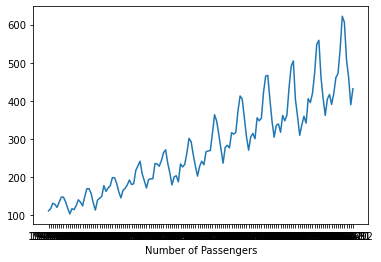

In [11]:
ax=plt.plot(airline)
plt.xlabel('Number of Passengers')
plt.plot()

Stationarity is a key part of time series analysis. Import the augmented Dickey-Fuller test from the statsmodels package.

In [12]:
#Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
#Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
#p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
#p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
from statsmodels.tsa.stattools import adfuller

result = adfuller(airline)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

# p value > 0.05 the data is non stationnary

ADF Test Statistic: 0.82
5% Critical Value: -2.88
p-value: 0.99


Let’s pass our data frame into the adfuller method. 
Here, we specify the autolag parameter as “AIC”, which means that the lag is chosen to minimize the information criterion

In [13]:
result = adfuller(airline, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: 0.8153688792060502
n_lags: 0.991880243437641
p-value: 0.991880243437641
Critial Values:
   1%, -3.4816817173418295
Critial Values:
   5%, -2.8840418343195267
Critial Values:
   10%, -2.578770059171598


Store our results in a dataframe display it

In [14]:
result

(0.8153688792060502,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

Explain the results

Autocorrelation
Checking for autocorrelation in time series data is another important part of the analytic process. 
This is a measure of how correlated time series data is at a given point in time with past values, 
which has huge implications across many industries. For example, if our passenger data has strong autocorrelation, we can assume that high passenger numbers today suggest a strong likelihood that they will be high tomorrow as well.
Please calculate and show the autocorrelation

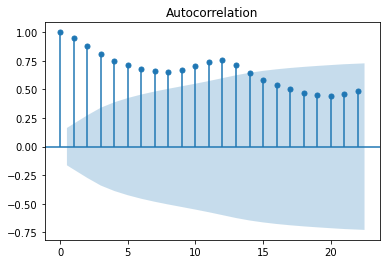

In [15]:
from statsmodels.graphics.tsaplots import plot_acf

# Calculate the ACF (via statsmodel)
plot_acf(airline)
# Show the data as a plot (via matplotlib)
plt.show()

Calculate partial autocorrelation

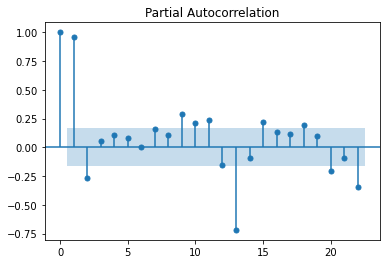

In [17]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
plot_pacf(airline, alpha =0.05)
plt.show()

Decomposition
Trend decomposition is another useful way to visualize the trends in time series data.
To proceed, let’s import seasonal_decompose from the statsmodels package:
from statsmodels.tsa.seasonal import seasonal_decompose


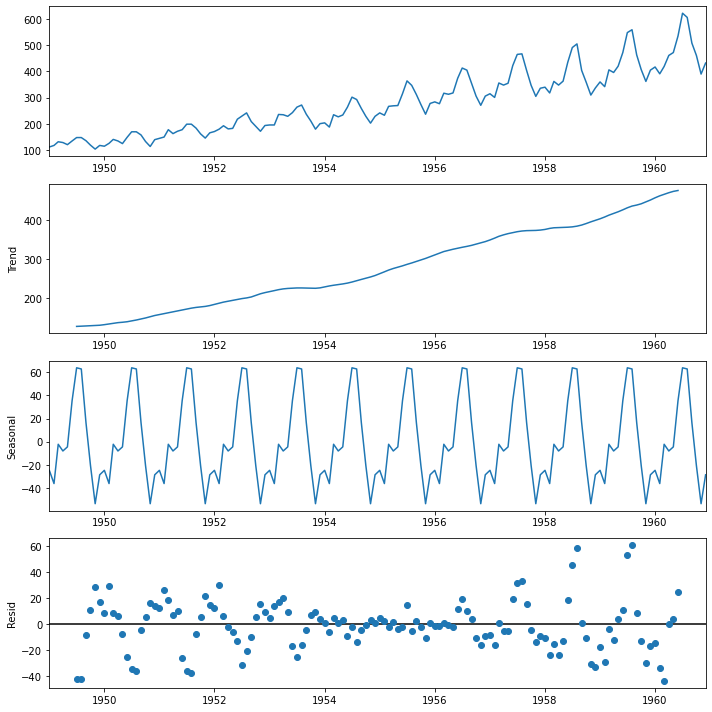

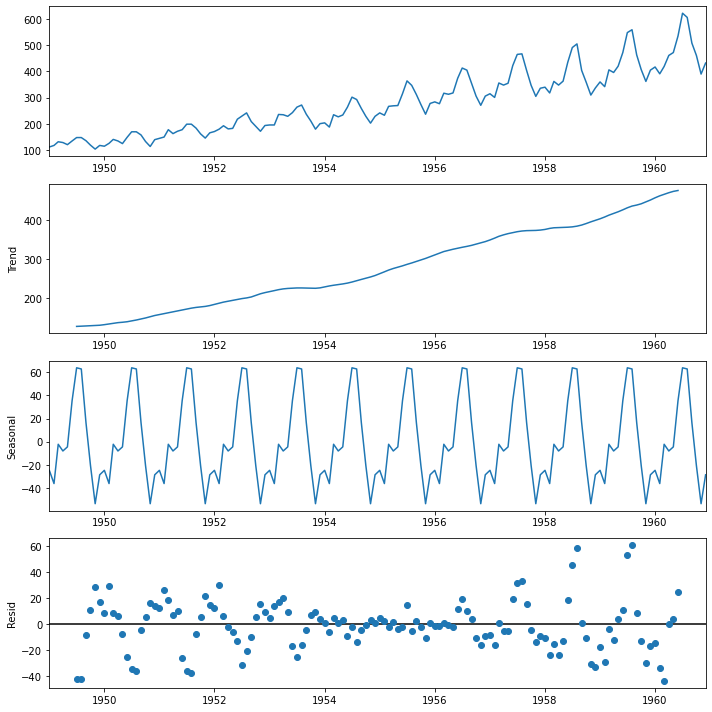

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal = seasonal_decompose(airline)
seasonal.plot()

Next, let’s pass our data frame into the seasonal_decompose method and plot the result:
decompose = 
decompose.plot()
plt.show()


In [59]:
# We identify a clear positive trend
# we have seasonality


Can you describe the charts?


Let's check the models on our dataset. Please note, if the dataset is non-stationary, you need to make it stationary

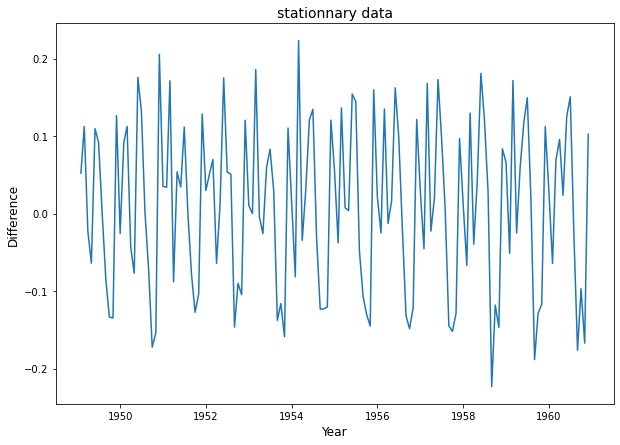

In [70]:
import numpy as np
airline['Difference'] = np.log(airline['Passengers']).diff().dropna() # diff for difference

# Plot the Change
plt.figure(figsize=(10, 7))
plt.plot(airline['Difference'])
plt.title('stationnary data', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

MA(1)

In [133]:
test = airline['Difference'][-12:]
total = airline['Difference'][:-12]

In [134]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(total.dropna(), order=(0,1)) #
MA1 = model.fit()

# summary of fit model
print(model_fit.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.49208D-01    |proj g|=  1.00899D-03

At iterate    5    f= -8.49211D-01    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5     10      1     0     0   0.000D+00  -8.492D-01
  F = -0.84921090346491945     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observati

 This problem is unconstrained.


Display the output

MA(2)

In [135]:
model = ARMA(total.dropna(), order=(0,2)) #
MA2 = model.fit()

# summary of fit model
print(MA2.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.03007D-01    |proj g|=  3.46528D+00

At iterate    5    f= -9.03606D-01    |proj g|=  2.02431D-01

At iterate   10    f= -9.03981D-01    |proj g|=  2.30405D+00

At iterate   15    f= -9.04572D-01    |proj g|=  1.26457D-02

At iterate   20    f= -9.04579D-01    |proj g|=  2.62708D-01

At iterate   25    f= -9.05083D-01    |proj g|=  1.40709D+00

At iterate   30    f= -9.06410D-01    |proj g|=  3.42619D-01

At iterate   35    f= -9.06522D-01    |proj g|=  3.53974D-02

At iterate   40    f= -9.06528D-01    |proj g|=  2.02355D-03

At iterate   45    f= -9.06528D-01    |proj g|=  3.67785D-03

At iterate   50    f= -9.06528D-01    |proj g|=  1.37570D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


Display the output

AR(2)

In [136]:
model = ARMA(total.dropna(), order=(2,0)) #
AR2 = model.fit()

# summary of fit model
print(model_fit.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.57295D-01    |proj g|=  8.35035D-02

At iterate    5    f= -8.57337D-01    |proj g|=  1.31178D-03

At iterate   10    f= -8.57337D-01    |proj g|=  8.18023D-04

At iterate   15    f= -8.57337D-01    |proj g|=  5.21805D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     20      1     0     0   5.218D-07  -8.573D-01
  F = -0.85733693416085976     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
        

 This problem is unconstrained.


ARMA (?,?)

In [137]:
model = ARMA(total.dropna(), order=(2,1)) #
ARMA1 = model.fit()

# summary of fit model
print(model_fit.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.69470D-01    |proj g|=  7.61939D+00

At iterate    5    f= -9.72475D-01    |proj g|=  2.79667D-01

At iterate   10    f= -9.73150D-01    |proj g|=  2.43897D+00

At iterate   15    f= -9.73699D-01    |proj g|=  8.21778D-03

At iterate   20    f= -9.74268D-01    |proj g|=  3.20572D-01

At iterate   25    f= -9.74366D-01    |proj g|=  8.97922D-01

At iterate   30    f= -9.77942D-01    |proj g|=  7.21487D-01

At iterate   35    f= -9.79082D-01    |proj g|=  4.65203D-01

At iterate   40    f= -9.79124D-01    |proj g|=  6.61383D-03

At iterate   45    f= -9.79127D-01    |proj g|=  1.74802D-02

At iterate   50    f= -9.79127D-01    |proj g|=  6.73847D-03

At iterate   55    f= -9.79127D-01    |proj g|=  3.03091D-06
  ys=-1.092E-14  -gs= 3.311E-14 BFGS update SKIPPED

At iterate   60    f= -9.79127D-01  

 This problem is unconstrained.


Display the output

ARIMA(?,?)

In [138]:
model = ARMA(total.dropna(), order=(2,2)) #
ARMA2 = model.fit()

# summary of fit model
print(model_fit.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.02284D+00    |proj g|=  4.85810D-01

At iterate    5    f= -1.02340D+00    |proj g|=  6.81995D-01

At iterate   10    f= -1.02651D+00    |proj g|=  2.83509D-02

At iterate   15    f= -1.02691D+00    |proj g|=  3.36615D-01

At iterate   20    f= -1.03146D+00    |proj g|=  3.55132D-01

At iterate   25    f= -1.03439D+00    |proj g|=  3.24367D-01

At iterate   30    f= -1.03822D+00    |proj g|=  1.72653D-03

At iterate   35    f= -1.03829D+00    |proj g|=  6.25338D-02

At iterate   40    f= -1.03830D+00    |proj g|=  4.88498D-06

At iterate   45    f= -1.03830D+00    |proj g|=  1.53211D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


Display the output

Let’s calculate root mean squared error (RMSE) for all the models. Explain the values

In [148]:
from statsmodels.tools.eval_measures import rmse

models=[MA1,MA2,AR2,ARMA21,ARMA22]

for model in models:
    forecast = model.predict(start=test.index[0], end=test.index[-1])
    rmse = rmse(forecast,test)
    print(rmse)
print()

0.10695518271523496


TypeError: 'numpy.float64' object is not callable

In [149]:
from statsmodels.tools.eval_measures import aic
print(MA1.aic)
print(MA2.aic)
print(AR2.aic)
print(ARMA21.aic)
print(ARMA22.aic)

-216.49325670780888
-229.51034869136527
-216.62227675014526
-270.15121258750304
-287.2808079214337
